# Titanic Survival Prediction #

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).

We'll be trying to predict a classification- survival or deceased.

## Importing the Essential Libraries

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Data

In [21]:
df = pd.read_csv ("titanic_train.csv")

### Let's Get To Know The Dataset

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

## Detecting Missing Values and Duplicates

First we use seaborn heatmap to see where we are missing data.

<IPython.core.display.Javascript object>


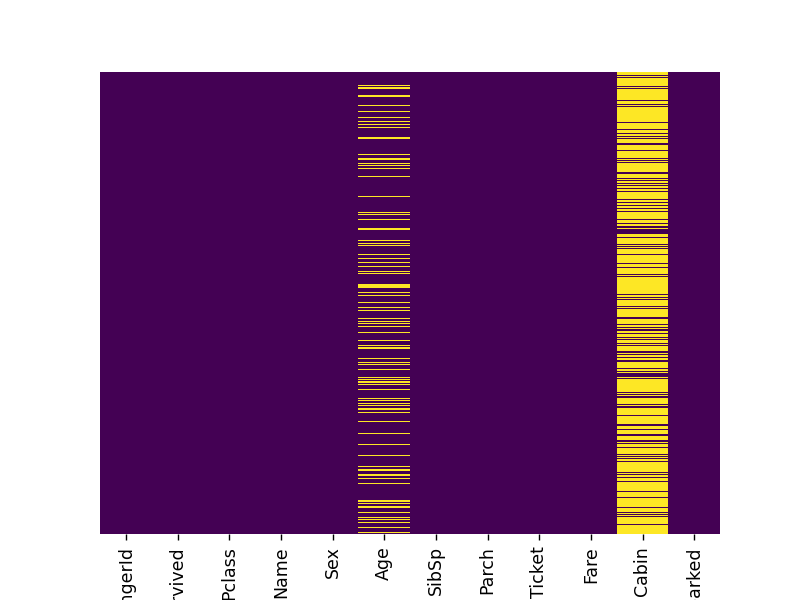

<AxesSubplot:>

In [6]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap= 'viridis')

It seems that we have some missing values in our data. We have to drop the "Cabin" column because there are a lot of missing values to fix. As for the "Age" columns, we are imputing the missing values with some form of imputation.

First thing to do, we want to see who survived and who didn't survived. 

<IPython.core.display.Javascript object>


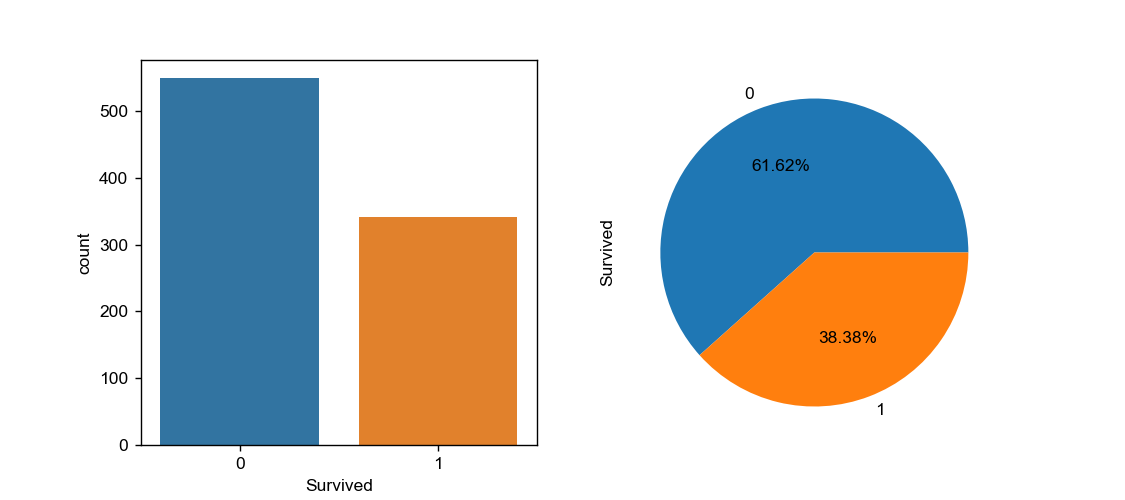

In [8]:
plt.figure(figsize = (9,4))
plt.subplot(1,2,1)
sns.countplot(x = 'Survived', data = df)
plt.subplot(1,2,2)
df['Survived'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
sns.set_style ('darkgrid')

<IPython.core.display.Javascript object>


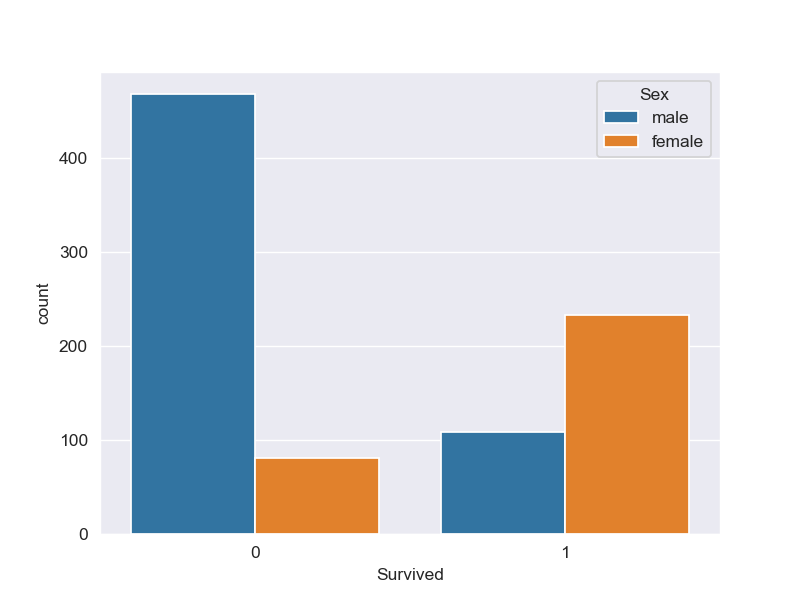

<AxesSubplot:xlabel='Survived', ylabel='count'>

In [9]:
sns.countplot (x='Survived', data=df, hue= 'Sex')

<IPython.core.display.Javascript object>


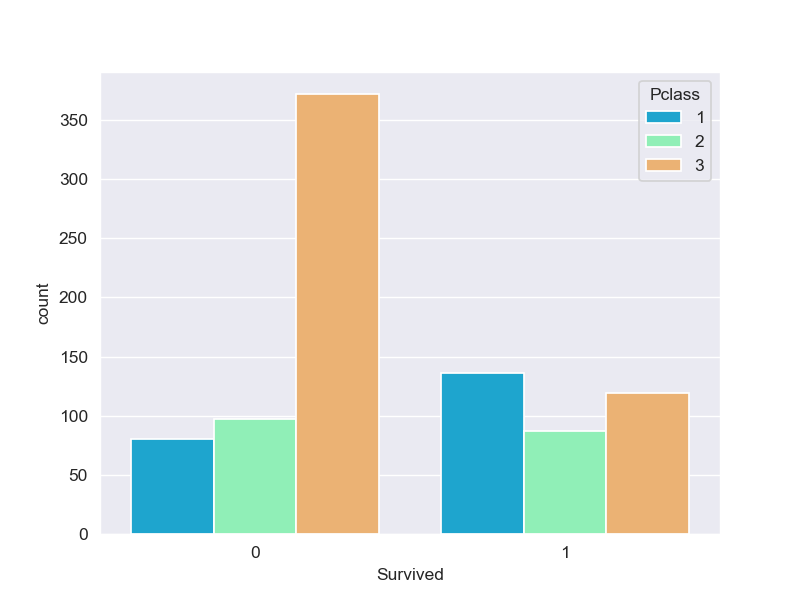

<AxesSubplot:xlabel='Survived', ylabel='count'>

In [10]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<IPython.core.display.Javascript object>


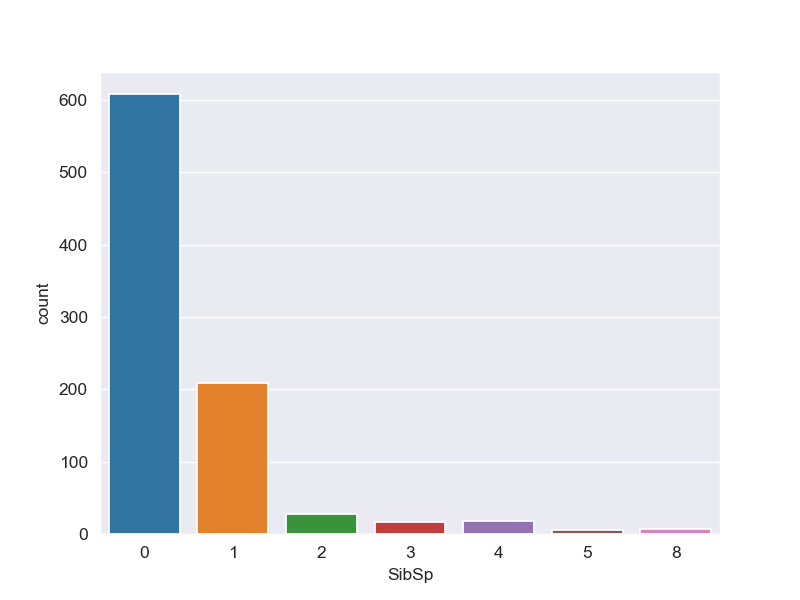

<AxesSubplot:xlabel='SibSp', ylabel='count'>

In [11]:
sns.countplot (x='SibSp',data = df)

This graph shows most of the people didn't have sibiling or spouse with themselves.

<IPython.core.display.Javascript object>


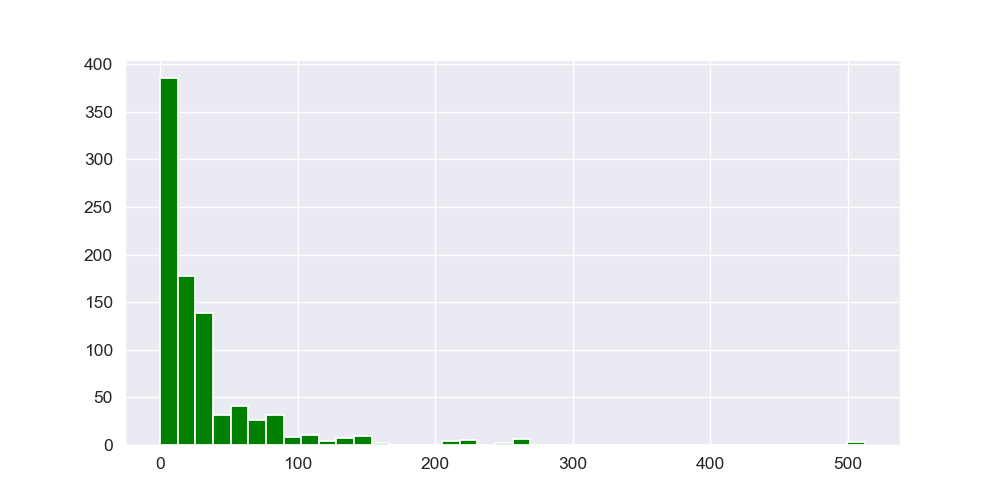

<AxesSubplot:>

In [13]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

Now, let's to have an idea about passangers' age

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


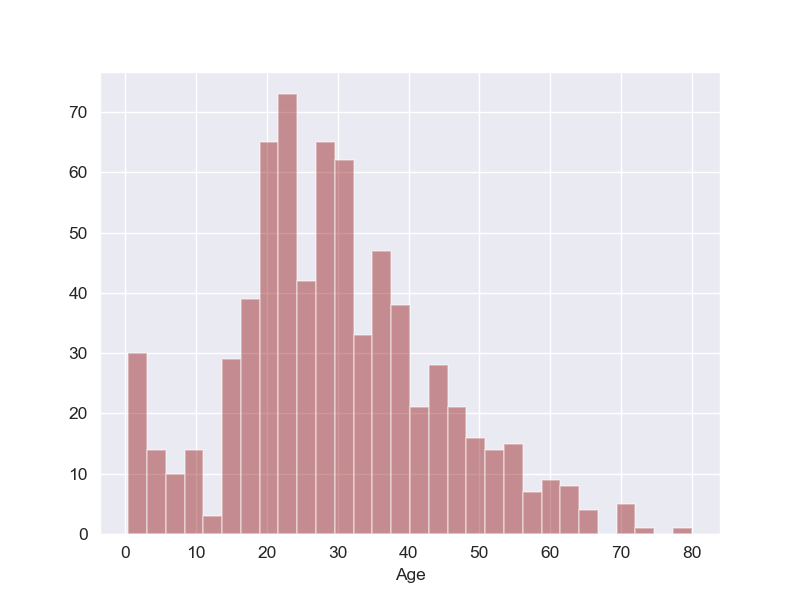

<AxesSubplot:xlabel='Age'>

In [12]:
sns.distplot (df['Age'].dropna(),kde=False, bins = 30, color='darkred')

-------------------------------



## Data Cleaning


Now we want to find out a way to replace missing data such as age. One way to do this is by filling in the mean age of all the passengers (imputation). Another way is to check the average age by passenger class to see if there is any trend or not. For example:

<IPython.core.display.Javascript object>


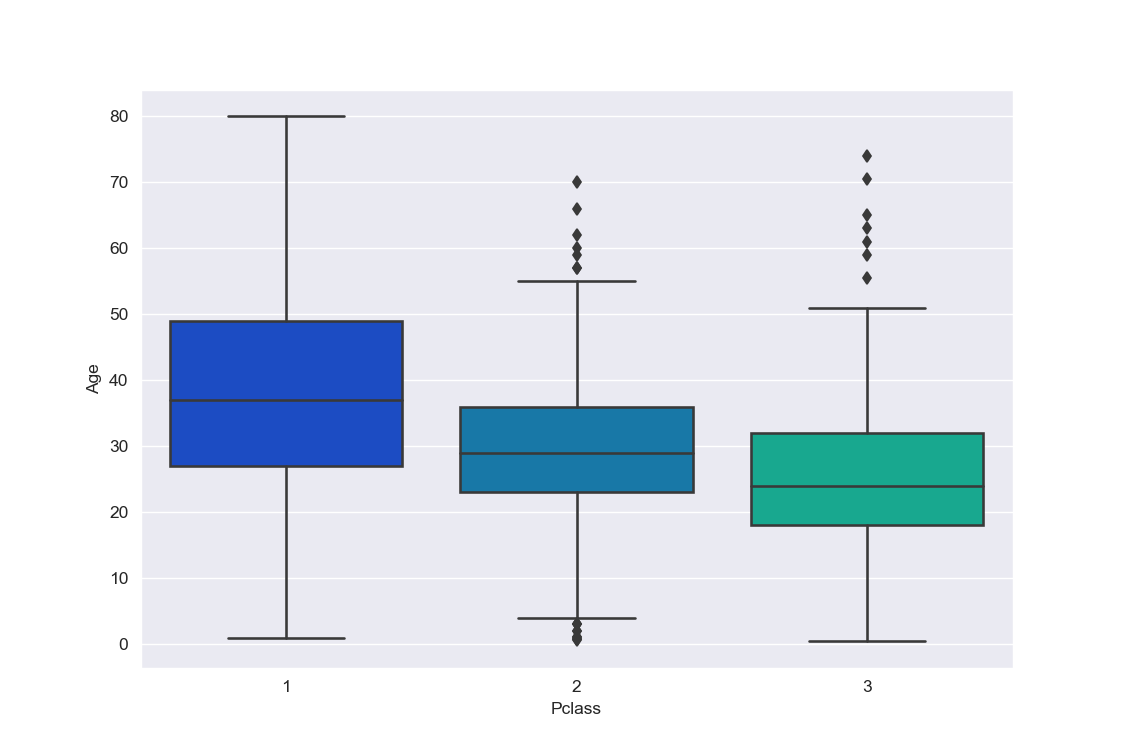

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

In [16]:
plt.figure(figsize=(9,6))
sns.boxplot (x='Pclass', y= 'Age', data=df,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [17]:
def impute_age (cols):
    Age = cols [0]
    Pclass = cols [1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Now apply that function!

In [22]:
df ['Age'] = df[['Age','Pclass']].apply(impute_age, axis =1)

Now let's check that heat map again!

<IPython.core.display.Javascript object>


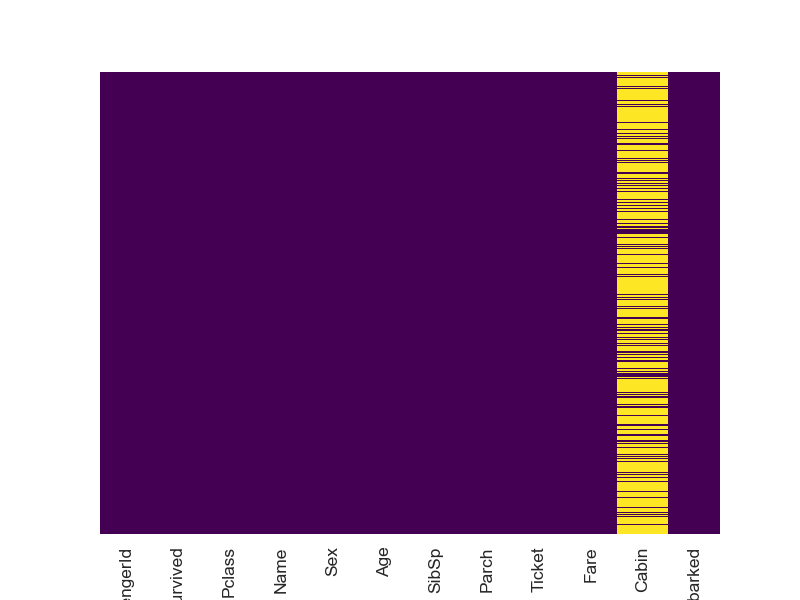

<AxesSubplot:>

In [23]:
sns.heatmap (df.isnull(),yticklabels=False, cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [24]:
df.drop('Cabin',axis=1, inplace=True)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
df.dropna(inplace=True)

## Converting Categorical Features


We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [28]:
Sex = pd.get_dummies (df['Sex'],drop_first=True)

In [30]:
embark = pd.get_dummies (df['Embarked'], drop_first=True)

Now we drop columns that we are not goint to use, such as Sex, Embark, ...

In [32]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [34]:
df = pd.concat ([df,Sex,embark], axis= 1)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!

---------------------

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [43]:
from sklearn.metrics import classification_report

In [44]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix (y_test, predictions)

array([[148,  15],
       [ 39,  65]], dtype=int64)